1. Regression: Automobile Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Dataset
url_auto = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df_auto = pd.read_csv(url_auto)

# 2. Data Cleaning & Preprocessing
# Ganti '?' menjadi NaN untuk memudahkan pembersihan
df_auto.replace('?', np.nan, inplace=True)

# Ubah kolom 'symboling' ke tipe float (jika belum)
df_auto.dropna(subset=['symboling'], inplace=True)
df_auto['symboling'] = df_auto['symboling'].astype(float)

# Pilih kolom numerik yang relevan
numeric_cols = [
    'symboling','wheel-base','length','width','height','curb-weight',
    'engine-size','bore','stroke','compression-ratio','horsepower',
    'peak-rpm','city-mpg','highway-mpg','price'
]

# Subset dataframe dengan kolom numerik dan buang baris yang masih memiliki NaN
df_auto = df_auto[numeric_cols].dropna()

# 3. Pisahkan Fitur (X) dan Target (y)
X = df_auto.drop('symboling', axis=1)
y = df_auto['symboling']

# 4. Bagi Data Menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Buat Model Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE       :", mse)
print("RMSE      :", rmse)
print("R-squared :", r2)


MSE       : 1.3830343678762613
RMSE      : 1.1760248160120863
R-squared : 0.14068820525335246


2. Classification: HeartDisease Dataset

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

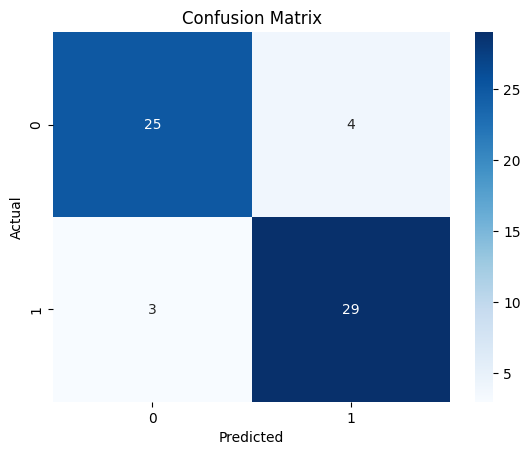

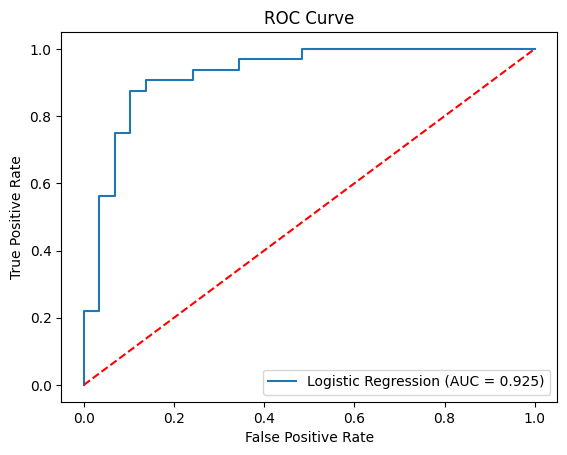

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# 1. Load Dataset
url_heart = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df_heart = pd.read_csv(url_heart)

# Tampilkan 5 baris awal dan info dataset untuk pengecekan
print(df_heart.head())
print(df_heart.info())

# 2. Buat target biner dari kolom 'num'
# jika num = 0 berarti tidak ada penyakit, sedangkan num > 0 berarti ada penyakit
df_heart['target'] = df_heart['num'].apply(lambda x: 0 if x == 0 else 1)

# Pisahkan fitur dan target
X = df_heart.drop(['num', 'target'], axis=1)
y = df_heart['target']

# 3. Bagi Data Menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tangani Missing Values dengan SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 5. Buat dan Latih Model Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_imputed, y_train)

# 6. Prediksi dan Evaluasi
y_pred = log_reg.predict(X_test_imputed)
y_prob = log_reg.predict_proba(X_test_imputed)[:, 1]

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
auc       = roc_auc_score(y_test, y_prob)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)
print("AUC      :", auc)

# Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
